Ваша задача - построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).

In [17]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

Загрузите датасет из приложения. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк.

In [52]:
x_ = pd.read_csv('11_x.csv',names=['x1','x2','x3','x4','x5'])
y_ = pd.read_csv('11_y.csv', names = ['Y'])

Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.

In [53]:
x_.shape

(66, 5)

In [54]:
x_.describe()

,x1,x2,x3,x4,x5
count,66.000000,66.000000,66.000000,66.000000,66.000000
mean,-0.030777,-0.010728,0.046851,0.204618,0.115513
std,1.089200,0.960890,1.007246,1.212652,1.031296
min,-2.275397,-2.538548,-1.853401,-2.837253,-2.178582
25%,-0.829504,-0.610886,-0.796535,-0.723116,-0.499444
50%,-0.023577,0.015184,0.123631,0.267437,0.009668
75%,0.674766,0.679896,0.815196,0.987150,0.869323
max,2.910753,2.802265,2.081260,2.854461,2.496833


In [55]:
y_.shape

(66, 1)

In [56]:
y_.describe()

,Y
count,66.000000
mean,-0.256583
std,68.202192
min,-169.589483
25%,-48.813907
50%,2.753673
75%,47.929578
max,193.971047


Разделите все наблюдения на обучающую и тестовую выборки в соотношении 80-20.

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_, y_, test_size=0.2, random_state=0)

Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
def r_2_score(column_name : str) -> None:
    y = LinearRegression().fit(x_train[[column_name]].values, y_train.values)
    y_res = y.predict(x_test[[column_name]].values)
    plt.scatter(x_test[[column_name]].values, y_test.values, color='pink')
    plt.plot(x_test[[column_name]].values, y_res, color='violet', linewidth=2)
    r_2 = y.score(x_test[[column_name]].values,  y_test.values)
    print(f"R^2 score: {r_2}")
 

1 Фактор.
Связи практически нет

R^2 score: 0.05267313872215629


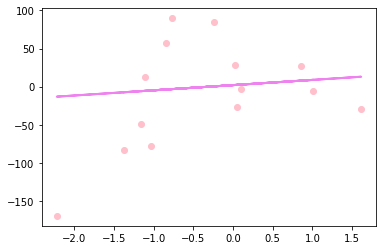

In [60]:
r_2_score("x1")

2 Фактор.
Связь есть. Средняя, R = 0.0

R^2 score: 0.9858799456831545


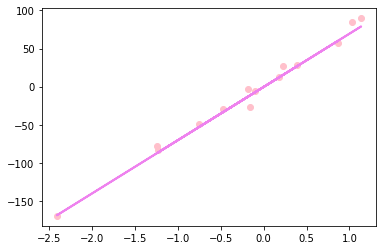

In [61]:
r_2_score("x2")

3 Фактор. Связи нет

R^2 score: -0.07925926745464884


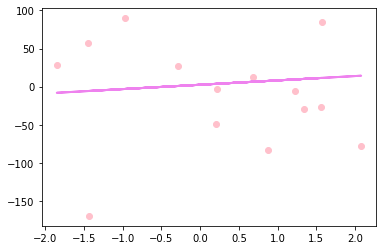

In [62]:
r_2_score("x3")

4 Фактор. Связи практически нет

R^2 score: -0.22752358641277226


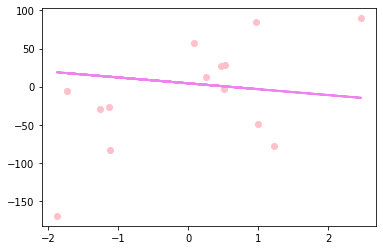

In [63]:
r_2_score("x4")

Фактор 5. Связи практически нет

R^2 score: -0.031939312712320866


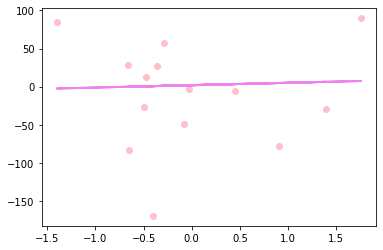

In [64]:
r_2_score("x5")


Вывод: существенная связь есть по фактору x2 (R^2 = 0.0) 

Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

In [66]:
import statsmodels.formula.api as sm

data = pd.DataFrame(np.array(x_train[['x1', 'x2', 'x3', 'x4', 'x5']]), 
                            columns=['x1', 'x2', 'x3', 'x4', 'x5'])
data['y'] = np.array(y_train)
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]

#метод наименьших квадратов
model = sm.ols(formula='y~x1+x2+x3+x4+x5', data=data)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     507.5
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           5.07e-39
Time:                        19:16:42   Log-Likelihood:                -187.99
No. Observations:                  52   AIC:                             388.0
Df Residuals:                      46   BIC:                             399.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4825      1.377     -1.077      0.287      -4.254       1.289
x1             0.8579      1.294      0.663      0.511      -1.746       3.462
x2            70.2407      1.417     49.559      0.000      67.388      73.094
x3             0.6913      1.526      0.453      0.653      -2.381       3.763
x4            -0.3017      1.135     -0.266      0.792      -2.587       1.984
x5             7.6635      1.254      6.114      0.000       5.140      10.187
==============================================================================
Omnibus:                        1.650   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                0.871
Skew:                          -0.049   Prob(JB):                        0.647
Kurtosis:                       3.626   Cond. No.                         1.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Вывод:

Если учитывать все факторы, то общий показатель модели по R^2 = 0.982, что является очень хорошей связью и тем, что модель жизнеспособна

Наиболее влияющие факторы - это x2 и x5 с коэффицентами 70.2407 и 	7.6635 соответственно. 

По DW мы можем видеть:
Автокорреляция отсутствует т.к. (1.5 < DW = 1.796 < 2)
Гомоскедастичность присутствует (1 < DW=1.796 < 2)

По Prob (F-statistic) = 5.07e-39 = 0 видим, что регрессия значима

Делая общий вывод, можем сказать, что полученная обобщенная модель по всем факторам имеет право на жизнь и с ней можно работать

 